# Inverse transform sampling for 2dim

> Paul G. Hoel, Introduction to Mahtemtical statistics, 5th edition, Wiley, 1984, ISBN:978-0471890454, p. 41

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

> Luc Devroye, Non-Uniform Random Variate Generation, Springer-Verlag, 1986, DOI:10.1007/978-1-4613-8643-8, ISBN:1461386454 

<table style="border-radius:8px;width:100%;">
<th style="text-align:center;background-color:rgb(0, 0, 0); color:white; border-top-left-radius: 10px;width:20%;">
Def</th>
<th style="text-align:left;">
Probability density function</th>
<tr style="text-align:center;">
<td colspan="2">

For continuous random variable $X$ and function $f$, $f$ is a *probability density* for $X$ that possesses the following properties:


$$f(x) \geq 0$$

$$\int_{-\infty}^\infty f(x) dx = 1$$

$$\int_{a}^b f(x) dx = P(a < X <b) $$

where $a,b$ are any two values of $x$ satisfying $a<b$.

</td>
</tr>

</table>

Cumulative distribution function of the discrete density


$$F_x(x) = P(X \leq x) = \sum_{x_i \leq x} P(X= x_i) = \sum_{x_i \leq x} p(x_i) $$

$$F_{xy}(x, y) = P(X \leq x, Y \leq y) = \sum_{x_i \leq x} \sum_{y_i \leq y } p(x_i, y_i)$$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from intsam import *

Let $X \times Y \in [-\frac{W_x}{2}, \frac{W_x}{2}] \times [-\frac{W_y}{2}, \frac{W_y}{2}]$

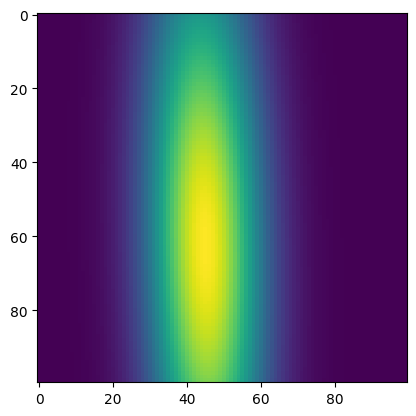

In [2]:
nx = ny = 100
end_xy = 2
x, y = np.mgrid[-end_xy:end_xy:end_xy/(nx/2), -end_xy:end_xy:end_xy/(nx/2)]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[5, 0.1], [0.1, 0.2]])
plt.imshow(rv.pdf(pos))

In [3]:
A = rv.pdf(pos)
A /= A.sum()
A_cul = pmf2cdf_2d(A)
top_cul =A_cul.ravel()

In [4]:
xpos, ypos = np.meshgrid(np.arange(nx), np.arange(ny), indexing="ij")
X, Y = xpos.ravel(), ypos.ravel()

top =A.ravel()
bottom = np.zeros_like(top)
width = depth =0.5

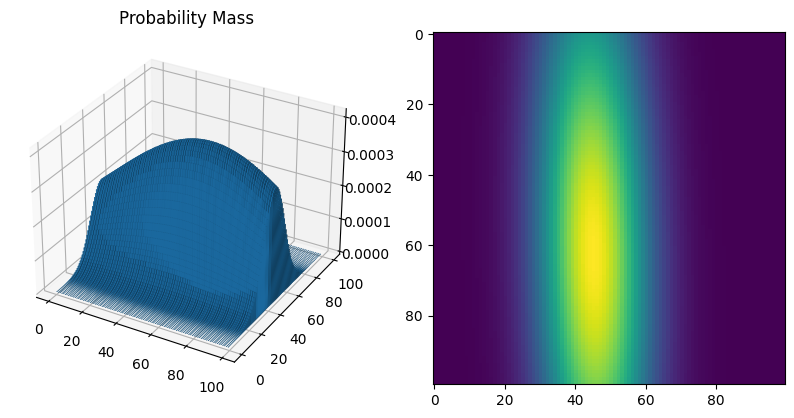

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top, shade=True, zsort='average')
ax.set_title("Probability Mass")
ax2.imshow(A)
plt.show()

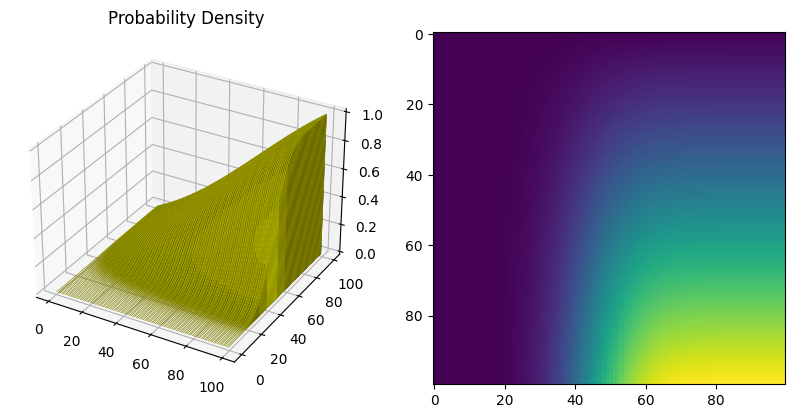

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top_cul, color="y", shade=True, zsort='average')
ax.set_title("Probability Density")
ax2.imshow(A_cul)
plt.show()

## For 2 dimension variable

About the probability density function $f_{XY}: \mathbb{R}^2 \rightarrow \mathbb{R}$ and its cumulative distribution function $F_{XY}: \mathbb{R}^2 \rightarrow [0, 1] \in \mathbb{R}$, there is no inverse routine for those function. 

Density function

$$f_{X|Y}(x |y) = \frac{f_{X,Y}(x, y)}{f_Y (y)}$$

only if $f_{Y}(y) >0$ otherwise $0$.

discrete version, mass function

$$p_{X|Y}(x |y) = \frac{p_{X,Y}(x, y)}{p_Y (y)}$$

Conditional c.d.f

$$F_{X|Y}(x,y') = P(X \leq x | Y = y') = \int_{-\infty}^x f_{X|Y}(u|y') du$$

discrete version, for probability mass function $p_{X|Y}$

$$ = \sum_{x' \leq x} p_{X|Y}(x' |y')$$

In [7]:
print(A.shape)

(100, 100)


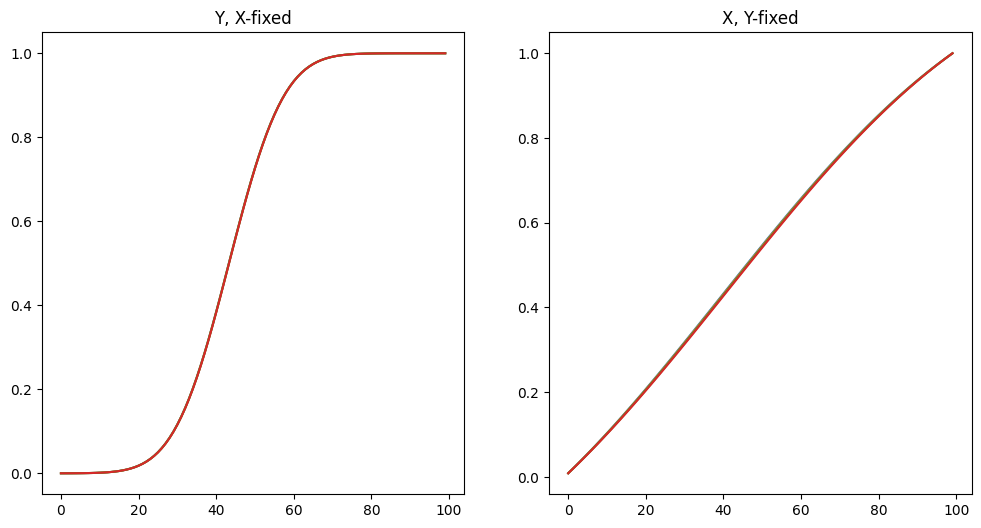

In [8]:
fig = plt.figure(figsize=(12,6))
rv_x, rv_y = np.arange(nx), np.arange(ny)
ax_x = fig.add_subplot(1, 2, 1)
ax_y = fig.add_subplot(1, 2, 2)
for i in range(0, 4):
    ax_x.plot(rv_x, cdf_cond(i, A))
    ax_y.plot(rv_y, cdf_cond(i, A, axis=1))
ax_x.set_title("Y, X-fixed")
ax_y.set_title("X, Y-fixed")
plt.show()


In [9]:
import collections

In [43]:
i = 2
pmf_i = pmf_cond(i, A, axis=0)
cdf_i = cdf_cond(i, A, axis=0)
rx = np.arange(nx)

1.0


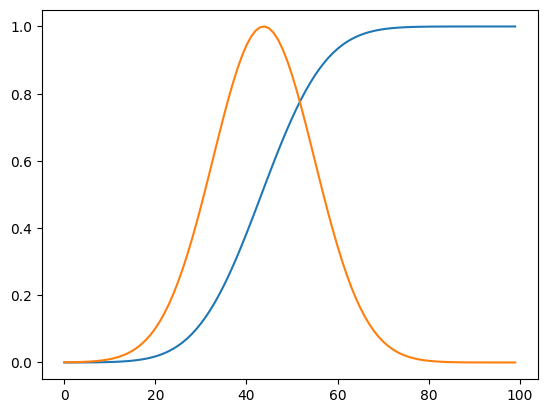

In [44]:
print(cdf_i.max())
plt.plot(rx, cdf_i/ cdf_i.max())
plt.plot(rx, pmf_i /pmf_i.max())

In [82]:
uni_sam = np.linspace(0, 1, 2000, endpoint=True)

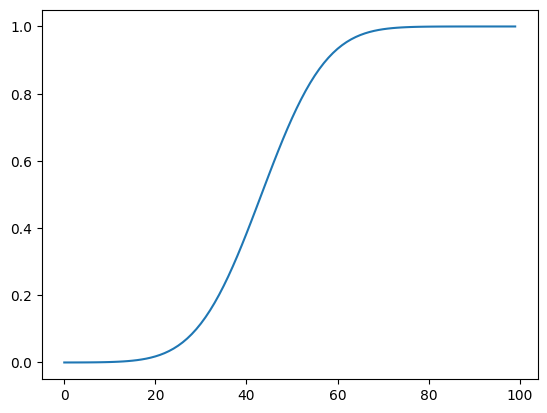

In [83]:
plt.plot(rx, cdf_i/ cdf_i.max())

In [84]:
sample = int_sampling(uni_sam, pmf_i)
data = collections.Counter(sample)

In [85]:
y = np.zeros_like(pmf_i)
for key in data.keys():
    y[key] = data[key]

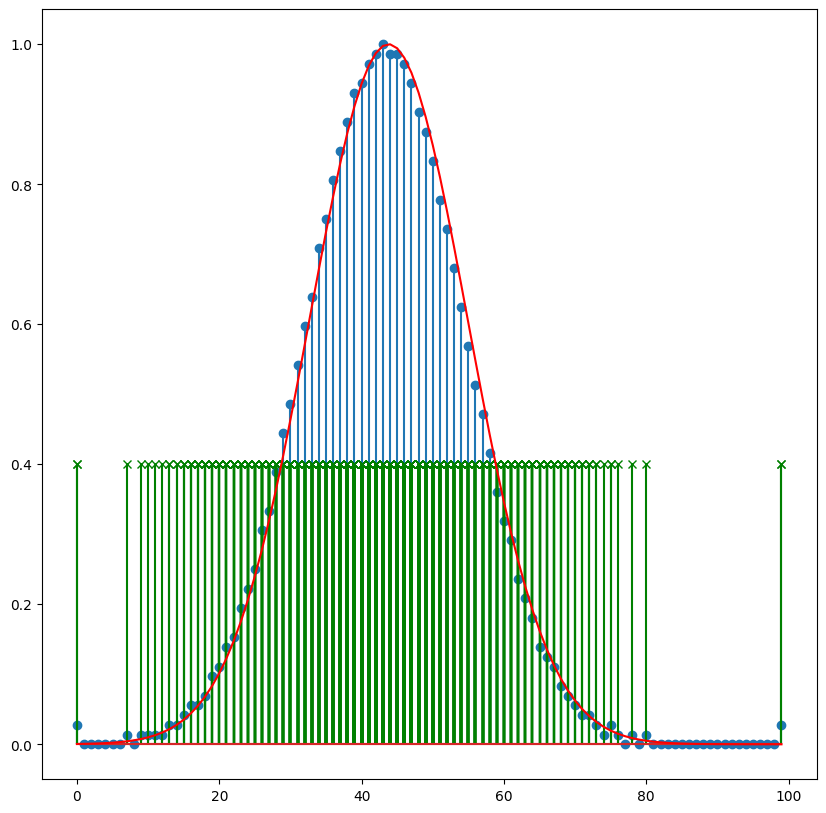

In [86]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.stem(rx, y/y.max())
ax.stem(sample, 0.4*np.ones_like(sample), 'g', markerfmt="x")
ax.plot(rx, pmf_i/pmf_i.max(), color="r")
plt.show()

The above plot shows that the limitation of discrete inverse transform.